In [4]:
# Import relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#upload data

df=pd.read_csv('ccfd.csv')
df.head(10)

,Time,Amount,Class,Merchant_Type,Transaction_Channel,Cardholder_Age,Transaction_Location,Transaction_History,Timestamp,Hour
0,79971,101.908163,0,travel,online,53,international,345.721081,2023-01-01 12:43:00,9
1,55556,241.486077,0,grocery,in-store,42,international,177.794562,2023-01-01 13:16:00,10
2,164832,460.900153,0,health,online,40,international,217.946929,2023-01-01 19:34:00,10
3,38192,157.301678,0,electronics,in-store,47,international,496.816517,2023-01-01 13:36:00,13
4,135453,66.656487,0,travel,in-store,45,international,153.470059,2023-01-01 10:10:00,18
5,150630,391.631656,0,electronics,in-store,48,local,461.415633,2023-01-01 12:19:00,14
6,30782,28.015049,0,travel,in-store,41,international,399.277245,2023-01-01 10:16:00,13
7,4782,423.020330,0,travel,online,41,local,248.050341,2023-01-01 13:20:00,11
8,150534,310.411764,0,health,online,44,local,225.207789,2023-01-01 11:58:00,12
9,60030,16.751915,0,travel,online,38,international,138.300246,2023-01-01 16:20:00,11


In [6]:
df.shape

(125913, 10)

In [7]:
#Data Cleaning step 1: Check for missing data

missing_values = df.isnull().sum()
print(missing_values)

Time                    0
Amount                  0
Class                   0
Merchant_Type           0
Transaction_Channel     0
Cardholder_Age          0
Transaction_Location    0
Transaction_History     0
Timestamp               0
Hour                    0
dtype: int64


In [8]:
#Data Cleaning Step 2: Check for duplicate entries

df.duplicated().sum()

345

In [14]:
#1341 Duplicates detected; clean dataset to remove duplicates and check for removal

df_cleaned= df.drop_duplicates()
df_cleaned.duplicated().sum()

0

In [16]:
#Data Cleanind Step 3: Ensure the data types are correctly applied

df_cleaned.dtypes

Time                      int64
Amount                  float64
Class                     int64
Merchant_Type            object
Transaction_Channel      object
Cardholder_Age            int64
Transaction_Location     object
Transaction_History     float64
Timestamp                object
Hour                      int64
dtype: object

In [18]:
# Initial EDA: Let's look at a statistics summary for numerical data types

round(df_cleaned.describe())

,Time,Amount,Class,Cardholder_Age,Transaction_History,Hour
count,125568.0,125568.0,125568.0,125568.0,125568.0,125568.0
mean,85926.0,232.0,0.0,42.0,276.0,13.0
std,49724.0,148.0,0.0,9.0,130.0,4.0
min,2.0,1.0,0.0,16.0,50.0,0.0
25%,42754.0,95.0,0.0,39.0,164.0,11.0
50%,86024.0,225.0,0.0,44.0,277.0,13.0
75%,128807.0,362.0,0.0,47.0,389.0,16.0
max,172798.0,500.0,1.0,65.0,500.0,23.0


In [20]:
# EDA Continued: Let's look at how our data is distributed

#Class Distribution in terms of percentages (Fraudelent = 1, else = 0)
class_dist= df_cleaned['Class'].value_counts(normalize=True)*100
print(class_dist)

Class
0    89.246464
1    10.753536
Name: proportion, dtype: float64


In [22]:
# Let's understand some characteristics of fradulent charges compared to non-fradulent
#Assess the medians to avoid skewing the data based on outliers 

#Age Comparison
median_age_fraud= df_cleaned[df_cleaned['Class']== 1]['Cardholder_Age'].median()
median_age_nonfraud= df_cleaned[df_cleaned['Class']== 0]['Cardholder_Age'].median()
print(f'Fradulent Median Age', median_age_fraud)
print(f'Non-Fradulent Median Age', median_age_fraud)

Fradulent Median Age 19.0
Non-Fradulent Median Age 19.0


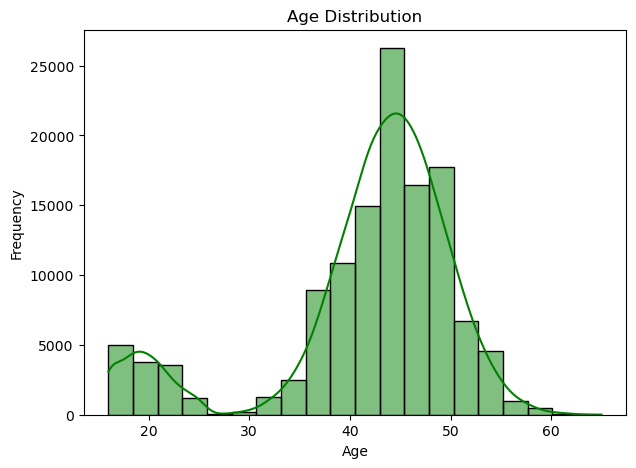

In [24]:
# Since the median age is the same, let's see if the distribution of ages provides further insight using matplotlib

#Plot Histogram
plt.figure(figsize=(7,5))
sns.histplot(df_cleaned['Cardholder_Age'], bins=20, kde=True, color='Green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

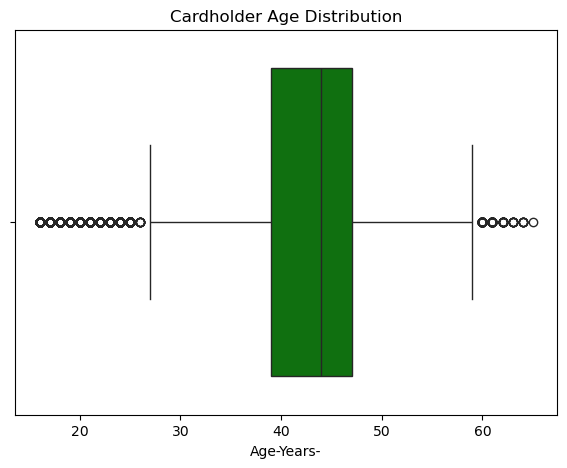

In [25]:
plt.figure(figsize=(7,5))
sns.boxplot(x=df_cleaned['Cardholder_Age'], color = 'Green')
plt.title('Cardholder Age Distribution')
plt.xlabel('Age-Years-')
plt.show


In [28]:
# Let's take a closer look at basic statistics for transaction amount and cardholder age

df_cleaned[['Amount','Cardholder_Age']].describe()


,Amount,Cardholder_Age
count,125568.000000,125568.000000
mean,232.392558,41.811520
std,148.379639,9.086769
min,1.264653,16.000000
25%,94.511754,39.000000
50%,224.584693,44.000000
75%,362.132737,47.000000
max,499.999935,65.000000


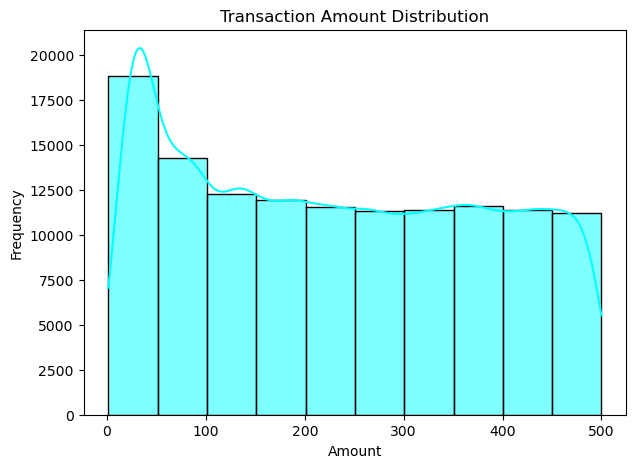

In [30]:
plt.figure(figsize=(7,5))
sns.histplot(df_cleaned['Amount'], bins= 10, kde=True, color = 'Cyan')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

C:\Users\umere\AppData\Local\Temp\ipykernel_28480\173148146.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Merchant_Type', data=df_cleaned, palette= 'Paired')


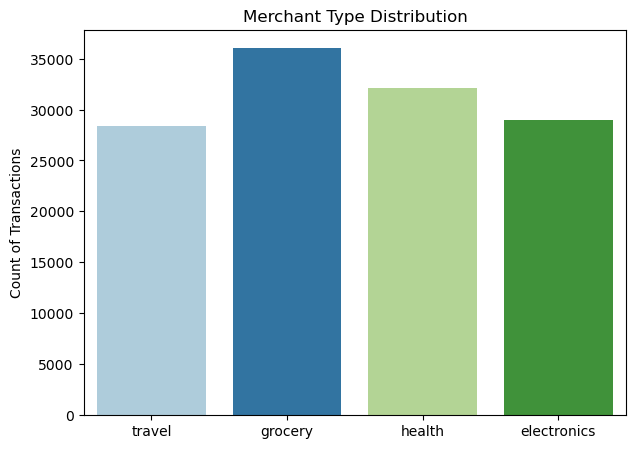

In [31]:
# Majority of transactions occur between 0 - 2500$ with minimal occurrences of higher dollar value transactions

# Merchant Type may also indicate a fradulent charge, so let's look at the transactions related to merchant types

plt.figure(figsize=(7,5))
sns.countplot(x='Merchant_Type', data=df_cleaned, palette= 'Paired')
plt.title('Merchant Type Distribution')
plt.xlabel(' ')
plt.ylabel('Count of Transactions')
plt.show()

In [34]:
# Fradulent Charges may have a higher likelihood of occuring in electronic or travel purchases based on the low frequency of transactions

# Let's continue exploring charges by grouping transaction location and transaction channel

channel_loc_count= df_cleaned.groupby(['Transaction_Channel', 'Transaction_Location']).size().unstack() 
print(channel_loc_count)

Transaction_Location  international  local
Transaction_Channel                       
in-store                      29842  28778
online                        35566  31382


<Figure size 700x500 with 0 Axes>

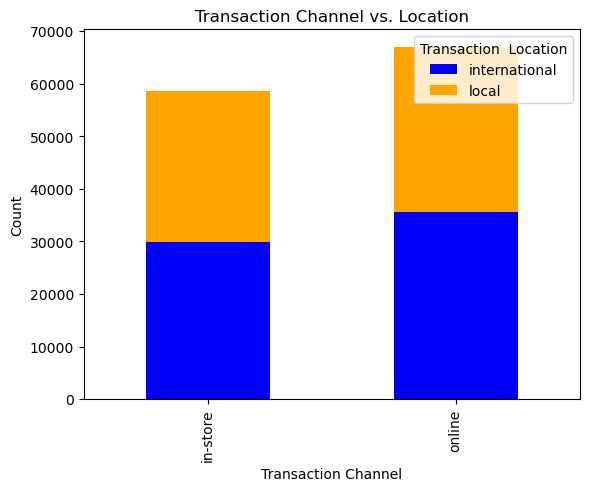

In [36]:
plt.figure(figsize=(7,5))
channel_loc_count.plot(kind='bar', stacked=True, color=['Blue','Orange'])
plt.title('Transaction Channel vs. Location')
plt.xlabel('Transaction Channel')
plt.ylabel('Count')
plt.legend(title='Transaction  Location')
plt.show()

In [38]:
# More transactions occur online compared to in store and fewer international transactions occur compared to local transactions.

In [40]:
amount_stats_by_class = df_cleaned.groupby('Class')['Amount'].describe()

fraud_hourly_counts = df_cleaned[df_cleaned['Class']==1].groupby('Hour').size()

fraud_merchants_count= df_cleaned[df_cleaned['Class']==1]['Merchant_Type'].value_counts()
print(amount_stats_by_class)
print(fraud_hourly_counts)
print(fraud_merchants_count)

          count        mean         std       min         25%         50%  \
Class                                                                       
0      112065.0  254.505420  141.144212  5.344981  132.435494  253.960606   
1       13503.0   48.872013   40.793067  1.264653   23.281589   34.222710   

              75%         max  
Class                          
0      376.389396  499.999935  
1       66.725539  192.522225  
Hour
0     1110
1     1011
2     1308
3     1235
4      944
5     1219
22    3333
23    3343
dtype: int64
Merchant_Type
grocery        7729
health         3977
electronics    1218
travel          579
Name: count, dtype: int64


In [42]:
import numpy as np

In [44]:
fraud_amounts = df[df['Class']==1]['Amount'].values
fraud_mean= np.mean(fraud_amounts)
fraud_median= np.median(fraud_amounts)
fraud_90th_perc= np.percentile(fraud_amounts, 90)

fraud_hourly_avg = df[df['Class']==1].groupby('Hour')['Amount'].mean()
peak_fraud_hour = fraud_hourly_avg.idxmax() #idxmax returns the index of the array for the max hourly avg
peak_amount_per_hr= fraud_hourly_avg.max()

print(fraud_hourly_avg)
print(peak_fraud_hour)
print(peak_amount_per_hr)
print(fraud_median, fraud_mean, fraud_90th_perc)


Hour
0     50.558682
1     47.882746
2     47.982203
3     48.335748
4     50.656185
5     48.415311
22    49.519676
23    48.064919
Name: Amount, dtype: float64
4
50.65618544209631
34.222709904287484 48.84388491948421 96.81536361065


C:\Users\umere\AppData\Local\Temp\ipykernel_28480\1458306945.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Class', y='Amount', palette= 'coolwarm')
C:\Users\umere\AppData\Local\Temp\ipykernel_28480\1458306945.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_hourly_counts.index, y=fraud_hourly_counts.values, palette= 'Reds')
C:\Users\umere\AppData\Local\Temp\ipykernel_28480\1458306945.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_merchants_count.index, y=fraud_merchants_count.values, palette= 'Blue

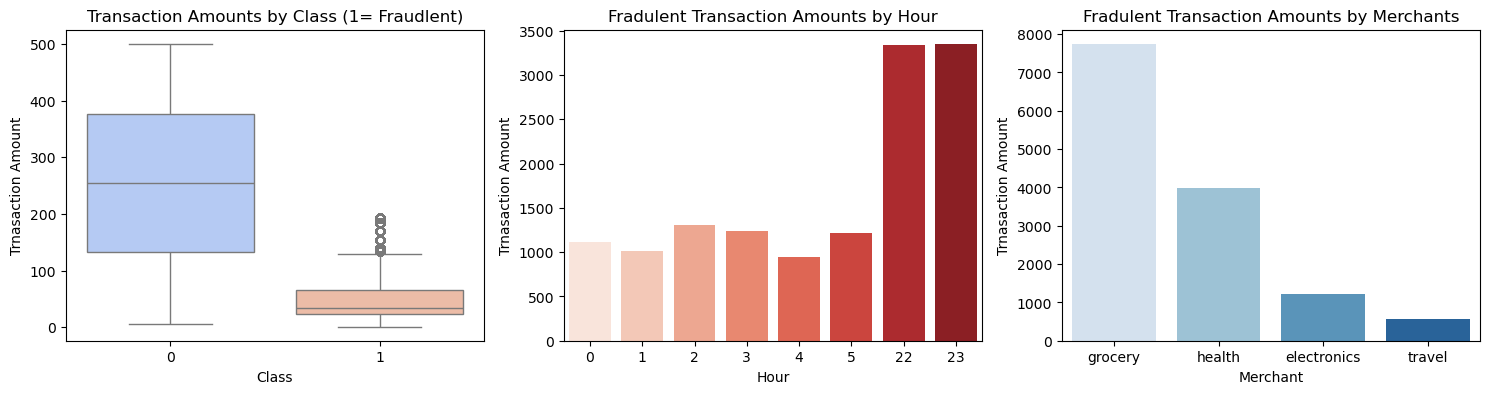

In [46]:
plt.figure(figsize=(15,11))

plt.subplot(3,3,1)
sns.boxplot(data=df, x='Class', y='Amount', palette= 'coolwarm')
plt.title('Transaction Amounts by Class (1= Fraudlent)')
plt.xlabel('Class')
plt.ylabel('Trnasaction Amount')

plt.subplot(3,3,2)
sns.barplot(x=fraud_hourly_counts.index, y=fraud_hourly_counts.values, palette= 'Reds')
plt.title('Fradulent Transaction Amounts by Hour')
plt.xlabel('Hour')
plt.ylabel('Trnasaction Amount')


plt.subplot(3,3,3)
sns.barplot(x=fraud_merchants_count.index, y=fraud_merchants_count.values, palette= 'Blues')
plt.title('Fradulent Transaction Amounts by Merchants')
plt.xlabel('Merchant')
plt.ylabel('Trnasaction Amount')

plt.tight_layout()
plt.show()

#Which Transaction channels and locations are more prone to fraud?

In [49]:
channel_counts= df.groupby(['Transaction_Channel', 'Class']).size().unstack()
location_counts= df.groupby(['Transaction_Location', 'Class']).size().unstack()

print(channel_counts)
print(location_counts)

Class                    0      1
Transaction_Channel              
in-store             55879   2756
online               56290  10988
Class                     0     1
Transaction_Location             
international         56054  9664
local                 56115  4080


In [51]:
# Let's translate these findings into percentages to easily digest the fradulent rates for each channel

In [53]:
fraud_rate_channel= channel_counts.loc[:,1]/channel_counts.sum(axis=1)*100
fraud_rate_location= location_counts.loc[:,1]/location_counts.sum(axis=1)*100

print(fraud_rate_channel)
print(fraud_rate_location)

Transaction_Channel
in-store     4.700264
online      16.332233
dtype: float64
Transaction_Location
international    14.705256
local             6.777972
dtype: float64


In [55]:
#let's visualize these findings 

<function matplotlib.pyplot.show(close=None, block=None)>

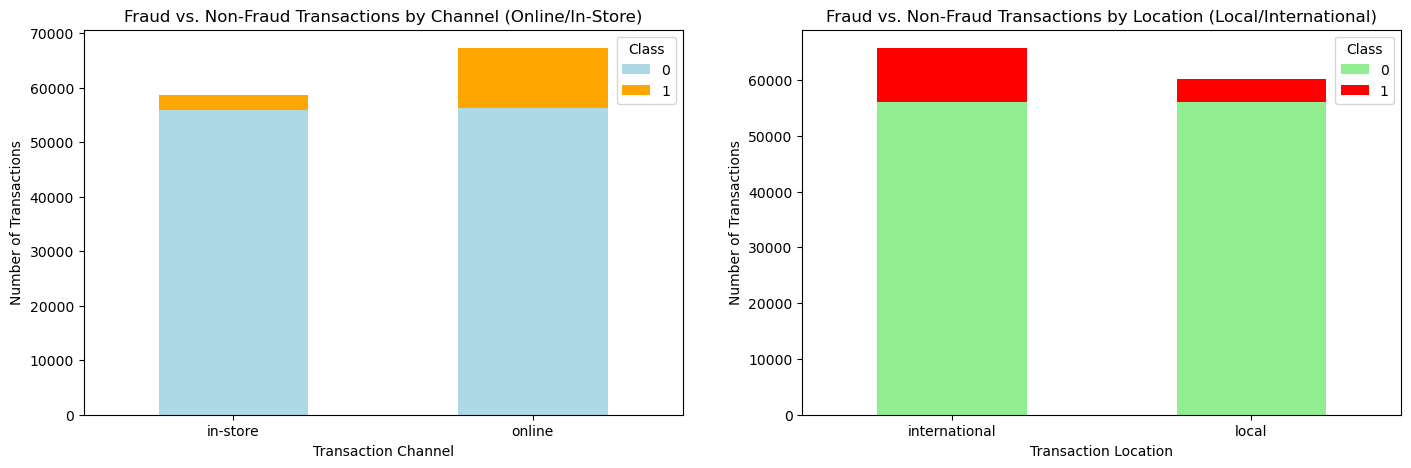

In [57]:
plt.figure(figsize=(17,11))

#Figure 1: Transaction Channel Stacked Bar
plt.subplot(2,2,1)
channel_counts.plot(kind='bar', stacked= True, color=['lightblue','orange'], ax=plt.gca())
plt.title('Fraud vs. Non-Fraud Transactions by Channel (Online/In-Store)')
plt.xlabel('Transaction Channel')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)

#Figure 2: Transaction Location Stacked Bar
plt.subplot(2,2,2)
location_counts.plot(kind='bar', stacked= True, color=['lightgreen','red'], ax=plt.gca())
plt.title('Fraud vs. Non-Fraud Transactions by Location (Local/International)')
plt.xlabel('Transaction Location')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)

plt.show

Fradulent activity is higher in Online purchases compared to in-store purchases | Fradulent Activity is also higher in international purchases compared to local

In [60]:
####Question 3: Are younger cardholders more likely to be involved in fradulent transactions compared to older cardholders?#####

In [62]:
#Let's categorize cardholder ages into 5 bins
bins = [16, 25, 40, 60, 100]
labels= ['16-25', '26-40', '41-60', '61+']
df_cleaned['Age_bracket'] = pd.cut(df_cleaned['Cardholder_Age'], bins= bins, labels= labels, right= True)



C:\Users\umere\AppData\Local\Temp\ipykernel_28480\2059784832.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Age_bracket'] = pd.cut(df_cleaned['Cardholder_Age'], bins= bins, labels= labels, right= True)


In [64]:
#Count Transaction Type according to each age bracket
age_bracket_counts= df_cleaned.groupby(['Age_bracket', 'Class']).size().unstack()
age_bracket_counts

C:\Users\umere\AppData\Local\Temp\ipykernel_28480\641526350.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_bracket_counts= df_cleaned.groupby(['Age_bracket', 'Class']).size().unstack()


Class,0,1
Age_bracket,,
16-25,14,11575
26-40,23824,0
41-60,88132,0
61+,95,0


In [66]:
fraud_rate_age= (age_bracket_counts[1]/age_bracket_counts.sum(axis=1))*100
fraud_rate_age

Age_bracket
16-25    99.879196
26-40     0.000000
41-60     0.000000
61+       0.000000
dtype: float64

99% of Fradulent charges have cardholder with an age between 16-25

In [69]:
fraud_ages= df_cleaned[df_cleaned['Class']==1]['Cardholder_Age'].values
mean_fraud_ages= np.mean(fraud_ages)
median_fraud_ages= np.median(fraud_ages)

print(mean_fraud_ages)
print(median_fraud_ages)

19.597274679700806
19.0


In [71]:
peak_fraud_age_bracket= fraud_rate_age.idxmax()
peak_fraud_rate= fraud_rate_age.max()

print(peak_fraud_age_bracket)
print(peak_fraud_rate)

16-25
99.87919578911037


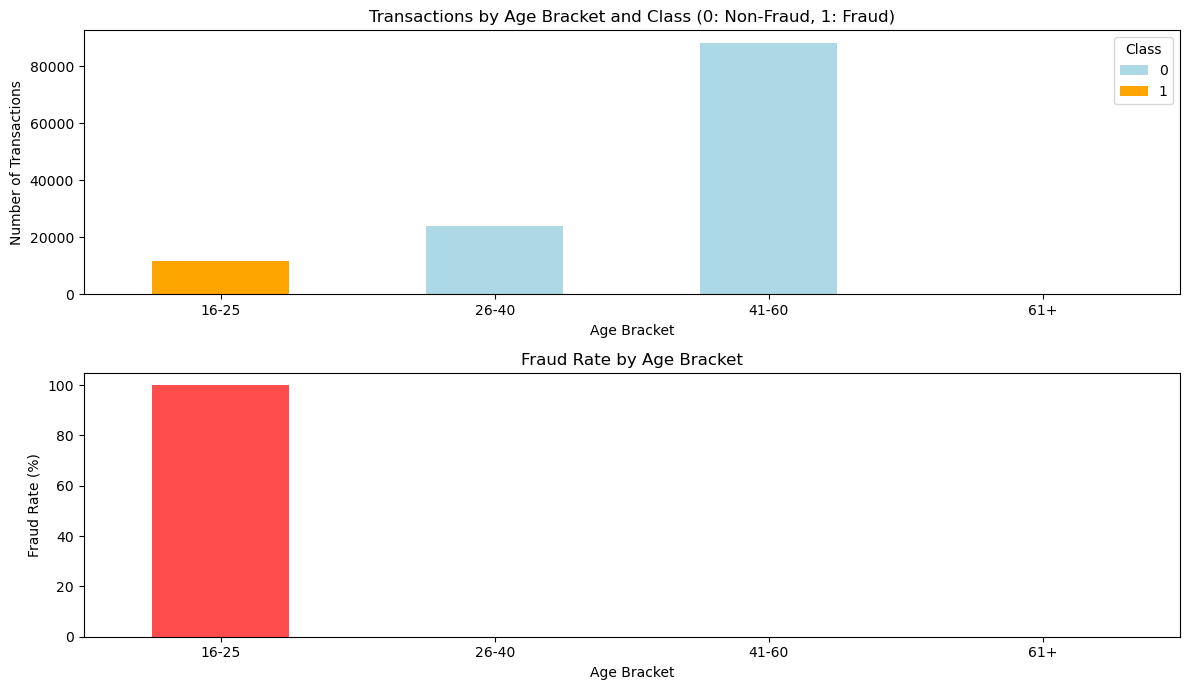

In [73]:
plt.figure(figsize=(12,7))

# Bar plot for fraud and non-fraud transactions by age bracket
plt.subplot(2,1,1)
age_bracket_counts.plot(kind='bar', stacked= True, color= ['lightblue', 'orange'], ax=plt.gca())
plt.title('Transactions by Age Bracket and Class (0: Non-Fraud, 1: Fraud)')
plt.xlabel('Age Bracket')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)

#Bar plot for % of Fraud transactions dsitrubuted over age brackets
plt.subplot(2,1,2)
fraud_rate_age.plot(kind='bar', color='red', alpha=0.7)
plt.title('Fraud Rate by Age Bracket')
plt.xlabel('Age Bracket')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


    Age bracket of 16-25 contains most of the Fradulent activity with minimal to no fraduelnt activity detected in older age brackets

In [76]:
##### How Does Transaction history differ between fraud and non-fraud cases?##############

In [78]:
history_stats_by_class = df_cleaned.groupby('Class')['Transaction_History'].describe()
print(history_stats_by_class)

          count        mean         std        min         25%         50%  \
Class                                                                        
0      112065.0  300.463029  115.641034  51.410211  200.069019  301.348875   
1       13503.0   75.381231   14.141675  50.037720   63.500718   75.521582   

              75%         max  
Class                          
0      400.712046  499.993189  
1       87.893809   99.937643  


In [80]:
#### Based on the statistical overview, we can use numpy to assign varaibles to key statistics for visualizations #####     

fraud_history = df_cleaned[df_cleaned['Class']== 1]['Transaction_History'].values

fraud_25th_perc= np.percentile(fraud_history, 25)
fraud_median = np.percentile(fraud_history, 50)
fraud_75th_perc = np.percentile(fraud_history, 75)

non_fraud_history = df_cleaned[df_cleaned['Class'] == 0]['Transaction_History'].values
non_fraud_mean= np.mean(non_fraud_history)
fraud_mean= np.mean(fraud_history)

mean_history_diff = abs(fraud_mean - non_fraud_mean)
print(fraud_25th_perc)
print(fraud_median)
print(fraud_75th_perc)

print(non_fraud_mean)
print(fraud_mean)

print(mean_history_diff)

63.50071751532662
75.52158181877779
87.89380918212314
300.4630292445107
75.38123064983773
225.081798594673


C:\Users\umere\AppData\Local\Temp\ipykernel_28480\3856881187.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot( data=df_cleaned, x= 'Class', y='Transaction_History', palette= 'coolwarm')


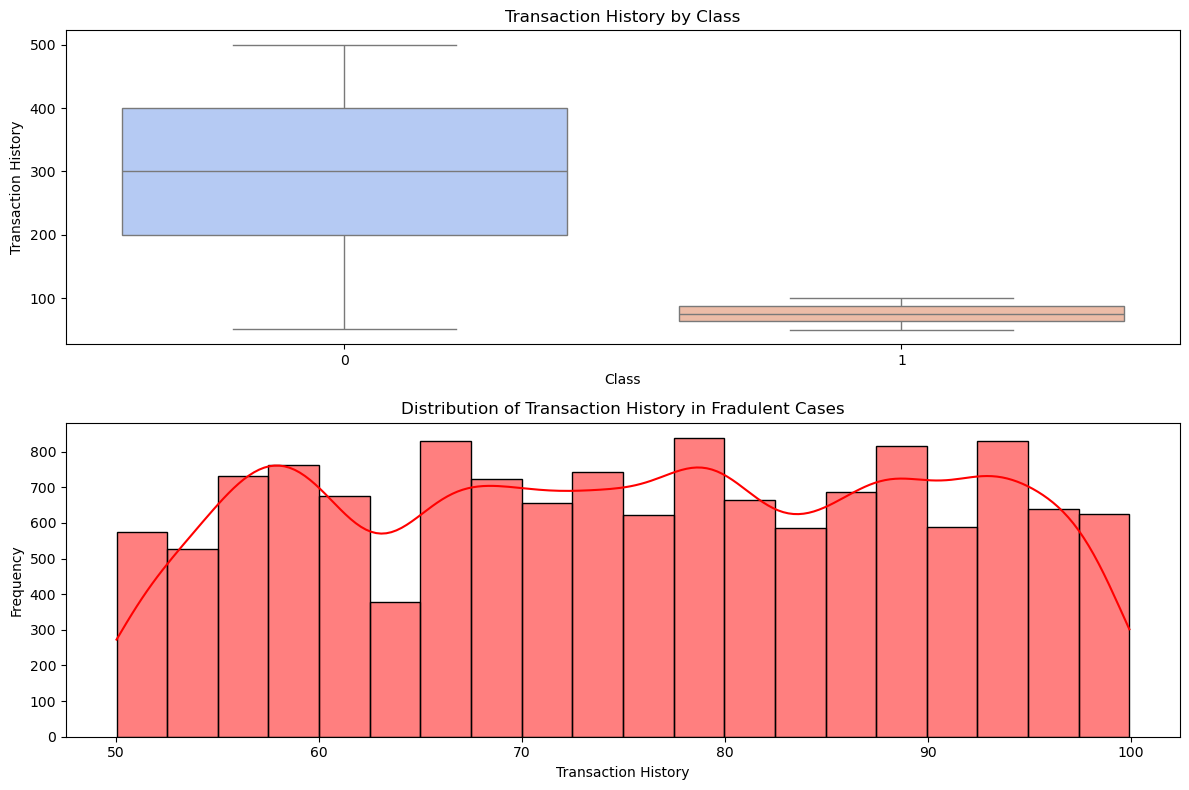

In [82]:
plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
sns.boxplot( data=df_cleaned, x= 'Class', y='Transaction_History', palette= 'coolwarm')
plt.title('Transaction History by Class')
plt.xlabel('Class')
plt.ylabel('Transaction History')

plt.subplot(2,1,2)
sns.histplot(fraud_history, bins= 20, kde=True, color= 'red')
plt.title ('Distribution of Transaction History in Fradulent Cases')
plt.xlabel('Transaction History')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


           

Fradulent charges use significantly lower dollar amounts compared to Non-fradulent charges based on the transaction history. Fradulent charges are also occur consistently between 50 and 100 dollar amounts

In [85]:
#### Can we identify any outliers or anomalies indicative of potential fraud cases based on data features? ###

In [87]:
Q1 = df_cleaned.groupby('Class')['Amount'].quantile(0.25)
Q3 = df_cleaned.groupby('Class')['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound= Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)

Class
0   -233.495361
1    -41.884335
Name: Amount, dtype: float64
Class
0    742.320250
1    131.891463
Name: Amount, dtype: float64


In [89]:
# Based on the Limits calculated, we can add a new column to flag whether a transaction is an outlier ##

df_cleaned['Amount_Outlier'] = df_cleaned.apply(lambda row: 1 
                                                if row['Amount'] < lower_bound[row['Class']] or row['Amount'] > upper_bound[row['Class']]                      
                                                else 0, axis = 1)

C:\Users\umere\AppData\Local\Temp\ipykernel_28480\3668334340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Amount_Outlier'] = df_cleaned.apply(lambda row: 1


In [90]:
fraud_outliers= df_cleaned[(df_cleaned['Class']==1) & (df_cleaned['Amount_Outlier'] == 1)]
non_fraud_outliers = df_cleaned[(df_cleaned['Class']==0) & (df_cleaned['Amount_Outlier'] == 1)]

fraud_outlier_percentage= len(fraud_outliers)/ len(df_cleaned[df_cleaned['Class'] == 1]) * 100
non_fraud_outlier_percentage = len(non_fraud_outliers)/ len(df_cleaned[df_cleaned['Class'] == 0]) * 100
print(fraud_outlier_percentage)
print(non_fraud_outlier_percentage)

6.954010219951122
0.0


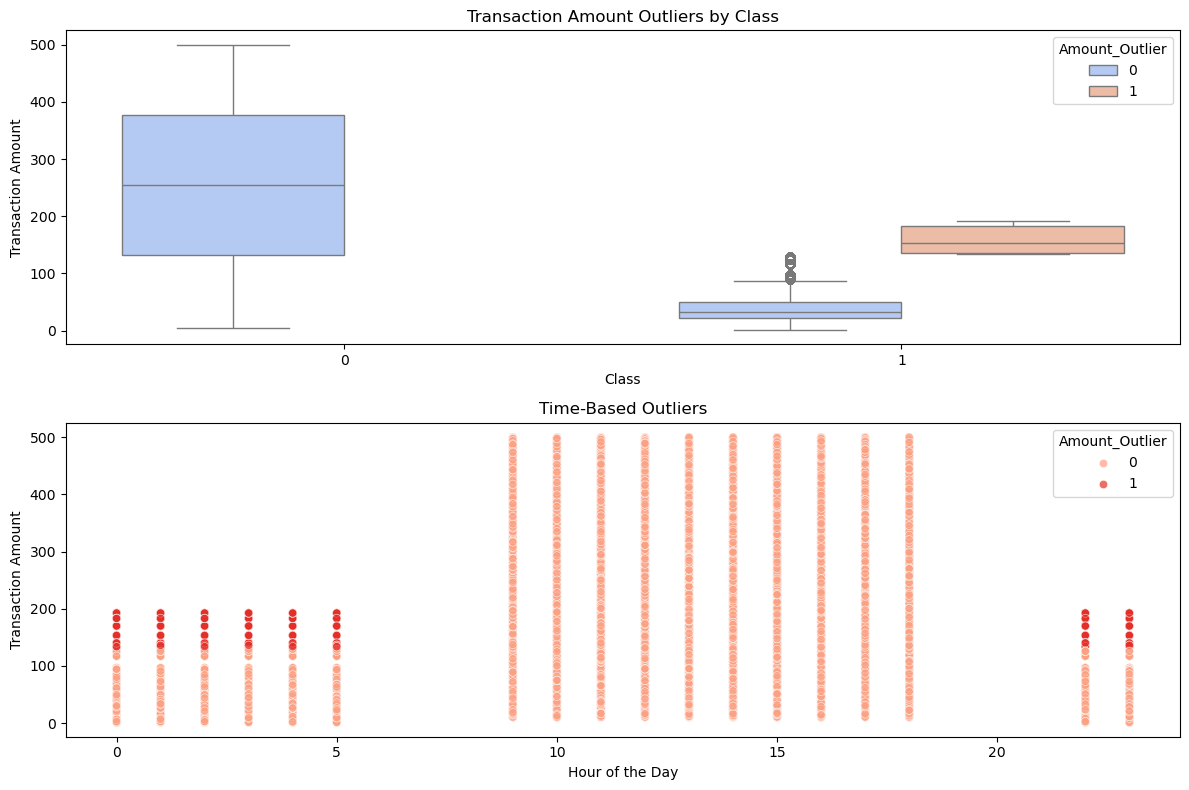

In [93]:
plt.figure(figsize=(12,8))

#Boxplot for tranasction amount outliers
plt.subplot(2,1,1)
sns.boxplot(data=df_cleaned, x='Class', y='Amount', hue='Amount_Outlier', palette= 'coolwarm')
plt.title('Transaction Amount Outliers by Class')
plt.xlabel('Class')
plt.ylabel('Transaction Amount')

#Scatter plot for time-based outliers
plt.subplot(2,1,2)
sns.scatterplot(data=df_cleaned ,x='Hour', y='Amount', hue='Amount_Outlier', palette='Reds', alpha=0.7)
plt.title('Time-Based Outliers')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Amount')

plt.tight_layout()
plt.show()

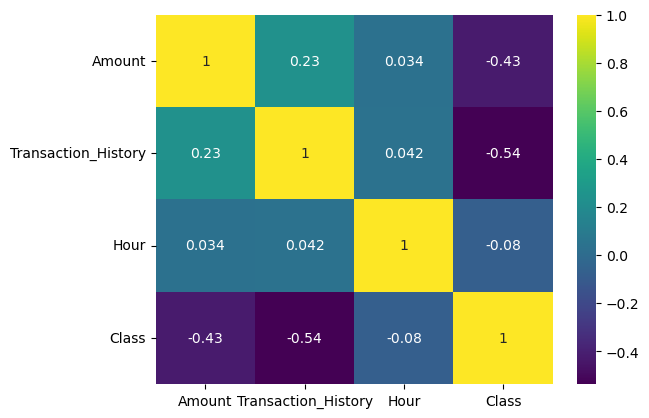

In [94]:
corr_matrix = df_cleaned[['Amount', 'Transaction_History', 'Hour', 'Class']].corr()

sns.heatmap(corr_matrix, annot=True, cmap='viridis', cbar=True)
plt.show()

In [95]:
##### Fraud Transaction Prediction ML Model ######

In [99]:
# Objective: Predict whether or not a transaction is fradulent according to the key features outlined 

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split

data= pd.read_csv('ccfd.csv')
print("Dataset Overivew:")
print(data.head())
print("\nDataset Info:")
print(data.info())

Dataset Overivew:
     Time      Amount  Class Merchant_Type Transaction_Channel  \
0   79971  101.908163      0        travel              online   
1   55556  241.486077      0       grocery            in-store   
2  164832  460.900153      0        health              online   
3   38192  157.301678      0   electronics            in-store   
4  135453   66.656487      0        travel            in-store   

   Cardholder_Age Transaction_Location  Transaction_History  \
0              53        international           345.721081   
1              42        international           177.794562   
2              40        international           217.946929   
3              47        international           496.816517   
4              45        international           153.470059   

             Timestamp  Hour  
0  2023-01-01 12:43:00     9  
1  2023-01-01 13:16:00    10  
2  2023-01-01 19:34:00    10  
3  2023-01-01 13:36:00    13  
4  2023-01-01 10:10:00    18  

Dataset Info:
<clas

In [103]:
# Define our feature columns and our target columns and drop columns that are not required for the model (X = train, Y =Test)

x = data.drop(columns=['Class', 'Timestamp', 'Time'])
y= data['Class']

print("Features Shape:", x.shape)
print("Target Shape:", y.shape)


Features Shape: (125913, 7)
Target Shape: (125913,)


In [105]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 42, stratify=y)

print("Training Features Shpe:", x_train.shape)
print("Testing Features Shape:", x_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)

Training Features Shpe: (100730, 7)
Testing Features Shape: (25183, 7)
Training Target Shape: (100730,)
Testing Target Shape: (25183,)


In [107]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numerical_features= ['Amount', 'Transaction_History']
categorical_features= ['Merchant_Type', 'Transaction_Channel', 'Transaction_Location']

#Standardize Numerical Features
numerical_transformer= Pipeline(steps=[
    ('scaler', StandardScaler())])

#Encode categorical Features
categorical_transformer= Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))]) # handle unseen categories

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

x_train_preprocessed = preprocessor.fit_transform(x_train)
print("Processed Traning Data Shape:", x_train_preprocessed.shape)

Processed Traning Data Shape: (100730, 10)


In [111]:
processed_columns = list(numerical_features) + list(
    preprocessor.named_transformers_['cat'].named_steps['encoder'].get_feature_names_out(categorical_features)
)

# Convert the preprocessed NumPy array to a DataFrame
X_train_preprocessed_df = pd.DataFrame(x_train_preprocessed, columns=processed_columns)

# Display the first few rows of the preprocessed data
print("Preprocessed Training Data Sample:")
print(X_train_preprocessed_df.head())

Preprocessed Training Data Sample:
     Amount  Transaction_History  Merchant_Type_electronics  \
0  1.801073            -0.830680                        0.0   
1 -0.023098             0.261082                        0.0   
2 -1.147414            -1.388718                        0.0   
3 -1.351511            -1.077328                        0.0   
4 -1.363956            -1.483500                        0.0   

   Merchant_Type_grocery  Merchant_Type_health  Merchant_Type_travel  \
0                    0.0                   0.0                   1.0   
1                    0.0                   0.0                   1.0   
2                    1.0                   0.0                   0.0   
3                    1.0                   0.0                   0.0   
4                    1.0                   0.0                   0.0   

   Transaction_Channel_in-store  Transaction_Channel_online  \
0                           0.0                         1.0   
1                          

In [113]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000, random_state=42)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), #prepocessing step
    ('classifer', log_reg) #Logistic Regression Model
])

pipeline.fit(x_train, y_train)

print("Model training complete.")

Model training complete.


In [115]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred= pipeline.predict(x_test)

#Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassifcation Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[22369    65]
 [   21  2728]]

Classifcation Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22434
           1       0.98      0.99      0.98      2749

    accuracy                           1.00     25183
   macro avg       0.99      0.99      0.99     25183
weighted avg       1.00      1.00      1.00     25183

